In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image

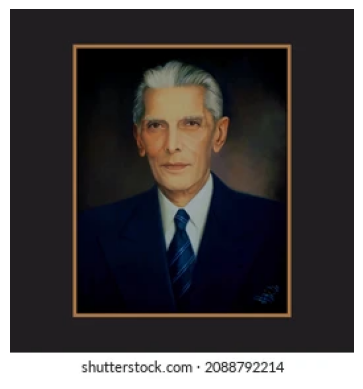

In [2]:
# Specify the full path to the image file with double backslashes
image_path = 'C:\\Users\\AIC\\Desktop\\images\\picture1.webp'

# Read in the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [3]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
# Convert the image to a numpy array
image_array = np.array(image)

# Get the shape of the image array
height, width, channels = image_array.shape

# Reshape the image array into a 2D array of pixels with 3 color values (RGB)
reshaped_image = image_array.reshape((height * width, channels))



# Remove the alpha channel
reshaped_image_rgb = reshaped_image[:, :3]

# Display the shape of the reshaped RGB image array
print("Shape of reshaped RGB image array:", reshaped_image_rgb.shape)

Shape of reshaped RGB image array: (72800, 3)


In [4]:
# Number of centroids (K)
K = 3

# Randomly select indices for centroids
centroid_indices = np.random.choice(len(reshaped_image), K, replace=False)

# Initialize centroids using randomly selected points
centroids = reshaped_image[centroid_indices]

# Display the indices of the randomly selected centroids
print("Indices of randomly selected centroids:", centroid_indices)

# Display the initialized centroids
print("Initialized centroids:")
print(centroids)

Indices of randomly selected centroids: [34391 18859  3907]
Initialized centroids:
[[ 22  22  22]
 [170 135  94]
 [ 33  30  33]]


In [5]:
# Assuming you have RGB values for each point in the image
# Replace these with the actual RGB values for your image
rgb_values_point1 = [255, 0, 0]  # Red
rgb_values_point2 = [0, 255, 0]  # Green
rgb_values_point3 = [0, 0, 255]  # Blue

# Initialize image_points array with RGB values for each point
image_points = np.array([
    rgb_values_point1,
    rgb_values_point2,
    rgb_values_point3
])
print("Shape of image_points array:", image_points.shape)


Shape of image_points array: (3, 3)


In [6]:
# Define centroids and image_points arrays (assuming they are already defined)
centroids = np.array([[255, 255, 255], [86, 110, 78], [73, 24, 8]])

# Define RGB values for image points
r1, g1, b1 = 100, 50, 150  # Replace these with actual RGB values of your first point
r2, g2, b2 = 200, 100, 50  # Replace these with actual RGB values of your second point
r3, g3, b3 = 50, 150, 100  # Replace these with actual RGB values of your third point

# Create the image_points array
image_points = np.array([[r1, g1, b1], [r2, g2, b2], [r3, g3, b3]])

# Calculate distances from each point to each centroid
distances = np.zeros((len(image_points), len(centroids)))
for i, point in enumerate(image_points):
    for j, centroid in enumerate(centroids):
        distances[i, j] = np.sqrt(np.sum((point - centroid) ** 2))

print("Distances array shape:", distances.shape)



Distances array shape: (3, 3)


In [7]:
# Calculate distances from each point to each centroid
# Calculate distances from each point to each centroid
distances = np.sqrt(np.sum((image_points[:, None] - centroids) ** 2, axis=-1))

print(distances)


[[277.62384624  94.76286192 146.86388256]
 [262.82123202 117.8134118  153.84732692]
 [277.62384624  58.13776741 157.69908053]]


In [8]:
# Assuming centroids and distances are already defined

# Initialize the regenerated image array with zeros
regenerated_image = np.zeros_like(image_points)

# Assign each pixel to the nearest centroid
for i in range(len(image_points)):
    closest_centroid_index = np.argmin(distances[i])
    regenerated_image[i] = centroids[closest_centroid_index]
print(regenerated_image)

[[ 86 110  78]
 [ 86 110  78]
 [ 86 110  78]]


In [9]:
regenerated_image.shape

(3, 3)

In [10]:
# Initialize the regenerated image array with the same shape as the original image
regenerated_image = np.zeros_like(image)
print(regenerated_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [11]:
image_points.shape

(3, 3)

In [12]:
regenerated_image = np.zeros_like(image_points)

# Assign each pixel to the nearest centroid
for i in range(len(image_points)):
    closest_centroid_index = np.argmin(distances[i])
    regenerated_image[i] = centroids[closest_centroid_index]

# Convert the regenerated image array back to uint8 type for display
regenerated_image = regenerated_image.astype(np.uint8)
print(regenerated_image)

[[ 86 110  78]
 [ 86 110  78]
 [ 86 110  78]]


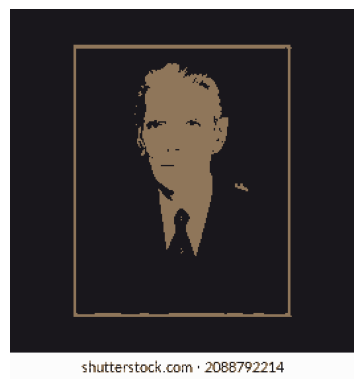

In [13]:
# Number of centroids (K)
K = 3

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()


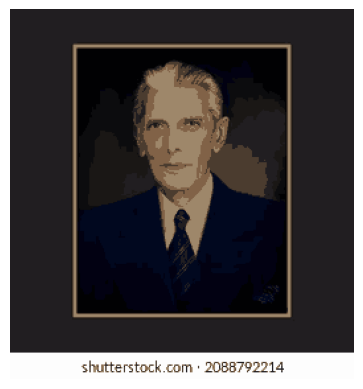

In [14]:
# Number of centroids (K)
K = 10

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()


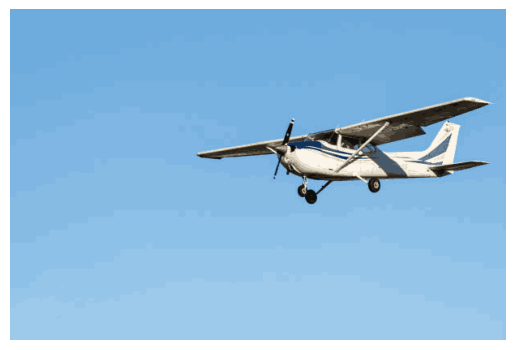

In [29]:
# Number of centroids (K)
K = 20

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()



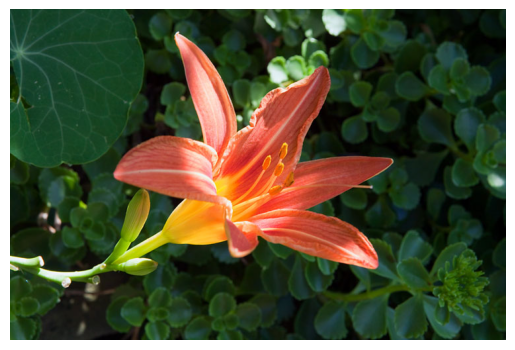

In [30]:
#Image 2
# Specify the full path to the image file with double backslashes
image_path = 'C:\\Users\\AIC\\Desktop\\images\\image2.jpg'

# Read in the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [31]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
# Convert the image to a numpy array
image_array = np.array(image)

# Get the shape of the image array
height, width, channels = image_array.shape

# Reshape the image array into a 2D array of pixels with 3 color values (RGB)
reshaped_image = image_array.reshape((height * width, channels))



# Remove the alpha channel
reshaped_image_rgb = reshaped_image[:, :3]

# Display the shape of the reshaped RGB image array
print("Shape of reshaped RGB image array:", reshaped_image_rgb.shape)

Shape of reshaped RGB image array: (375000, 3)


In [32]:
# Number of centroids (K)
K = 3

# Randomly select indices for centroids
centroid_indices = np.random.choice(len(reshaped_image), K, replace=False)

# Initialize centroids using randomly selected points
centroids = reshaped_image[centroid_indices]

# Display the indices of the randomly selected centroids
print("Indices of randomly selected centroids:", centroid_indices)

# Display the initialized centroids
print("Initialized centroids:")
print(centroids)

Indices of randomly selected centroids: [283602 284367  18108]
Initialized centroids:
[[25 38 12]
 [15 14 10]
 [25 71 45]]


In [33]:
# Calculate distances from each point to each centroid
# Calculate distances from each point to each centroid
distances = np.sqrt(np.sum((image_points[:, None] - centroids) ** 2, axis=-1))

print(distances)


[[157.52142711 167.69317219 130.73255142]
 [189.5072558  207.89660892 177.45703705]
 [144.6132774  166.79628293  99.45350673]]


In [20]:
#  Initialize the regenerated image array
regenerated_image = np.zeros_like(image_points)

# Assign each pixel to the nearest centroid
for i in range(min(len(image_points), len(distances))):
    closest_centroid_index = np.argmin(distances[i])
    regenerated_image[i] = centroids[closest_centroid_index]

# Convert the regenerated image array back to uint8 type for display
regenerated_image = regenerated_image.astype(np.uint8)
print(regenerated_image)


[[190  81  76]
 [190  81  76]
 [ 26  62  26]]


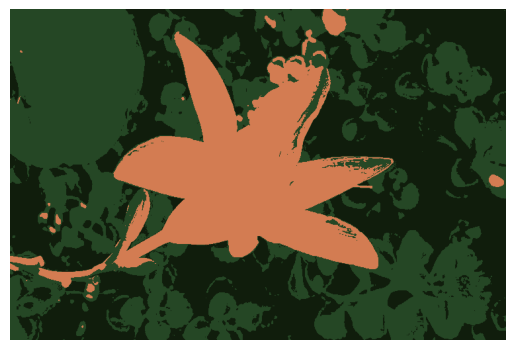

In [21]:
# Number of centroids (K)
K = 3

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()


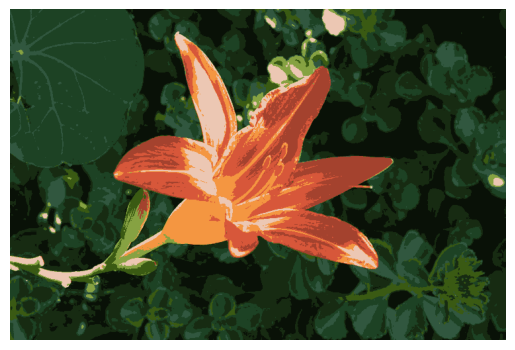

In [22]:
# Number of centroids (K)
K = 10

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()

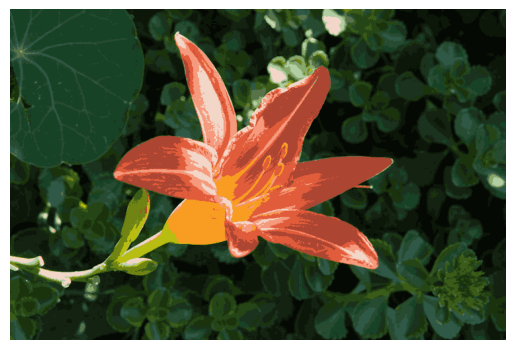

In [23]:
# Number of centroids (K)
K = 20

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

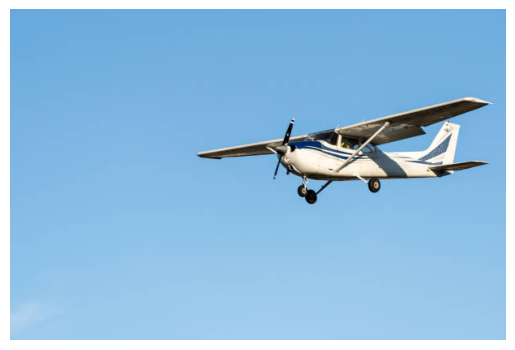

In [24]:
#IMAGE 3
# Specify the full path to the image file with double backslashes
image_path = 'C:\\Users\\AIC\\Desktop\\images\\image3.jpg'

# Read in the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show


In [25]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
# Convert the image to a numpy array
image_array = np.array(image)

# Get the shape of the image array
height, width, channels = image_array.shape

# Reshape the image array into a 2D array of pixels with 3 color values (RGB)
reshaped_image = image_array.reshape((height * width, channels))



# Remove the alpha channel
reshaped_image_rgb = reshaped_image[:, :3]

# Display the shape of the reshaped RGB image array
print("Shape of reshaped RGB image array:", reshaped_image_rgb.shape)

Shape of reshaped RGB image array: (249696, 3)


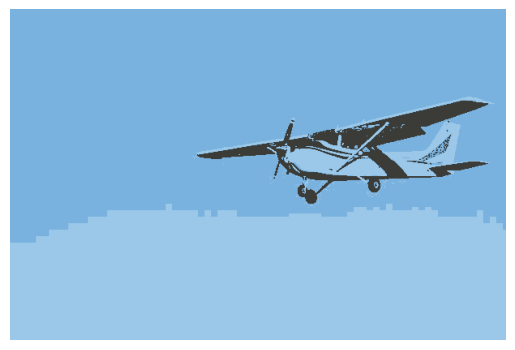

In [26]:
# Number of centroids (K)
K = 3

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()


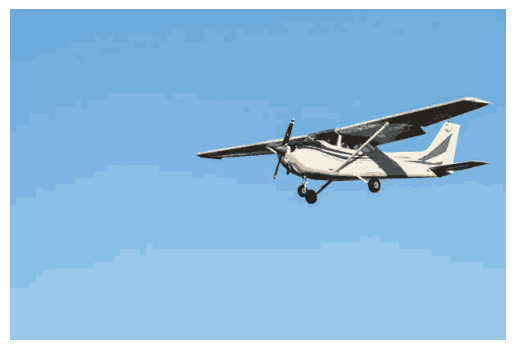

In [27]:
# Number of centroids (K)
K = 10

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()

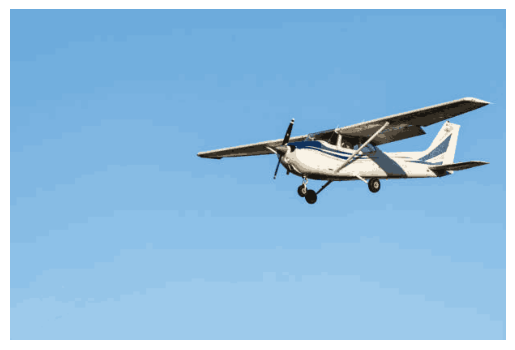

In [28]:
import numpy as np
# Number of centroids (K)
K = 20

# Randomly initialize centroids
centroids_indices = np.random.choice(len(reshaped_image), K, replace=False)
centroids = reshaped_image[centroids_indices]

# Assign each pixel to the nearest centroid
def assign_clusters(image_points, centroids):
    distances = np.sqrt(np.sum((image_points[:, np.newaxis] - centroids) ** 2, axis=2))
    labels = np.argmin(distances, axis=1)
    return labels

# Update centroids
def update_centroids(image_points, labels, K):
    new_centroids = np.zeros((K, 3))
    for k in range(K):
        cluster_points = image_points[labels == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

# Iterate until convergence or max iterations
max_iterations = 100
for _ in range(max_iterations):
    labels = assign_clusters(reshaped_image, centroids)
    new_centroids = update_centroids(reshaped_image, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Assign each pixel to the nearest centroid based on the final centroids
final_labels = assign_clusters(reshaped_image, centroids)

# Create the regenerated image by assigning each pixel the color of its centroid
regenerated_image = centroids[final_labels].reshape(image_array.shape)

# Convert regenerated image to uint8 type for display
regenerated_image = np.uint8(regenerated_image)

# Display the regenerated image
plt.imshow(regenerated_image)
plt.axis('off')
plt.show()

